In [6]:
import pandas as pd
import io
import requests
from IPython.core.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%load_ext rpy2.ipython

pd.options.display.max_columns = 50

Tests covered in Chatper 9:
1. Sign Test
2. Wilcoxon Signed-Rank Test
3. Wilcoxon Rank-Sum Test

**Cardinal data** are on a scale where it is meaningful to measure the distance between possible data values.

    Ex1. Body weight is a cardinal variable because a difference of 6 lb is twice as large as a difference of 3 lb.

For cardinal data, if the zero point is arbitrary, then the data are on an **interval scale**; if the zero point is fixed, then the data are on a **ratio scale**.

    Ex1. Body temperature is on an interval scale because the zero point is arbitrary. For example, the zero point has a different meaning for temperatures measured in Fahrenheit vs. Celsius.
    
    Ex2. Blood pressure and body weight are on ratio scales because the zero point is well defined in both instances.
    
**Ordinal data** can be ordered but do not have specific numeric values. Thus, common arithmetic cannot be performed on ordinal data in a meaningful way.

    Ex1. Visual acuity can be measured on an ordinal scale because we know 20–20 vision is better than 20–30, which is better than 20–40, and so on. How- ever, a numeric value cannot easily be assigned to each level of visual acuity that all ophthalmologists would agree on.
    
Data are on a **nominal scale** if different data values can be classified into categories but the categories have no specific ordering.

    Ex1. In classifying cause of death among patients with documented anal- gesic abuse, the following categories were used: (1) cardiovascular disease, (2) cancer, (3) renal or urogenital disease, and (4) all other causes of death. Cause of death is a good example of a nominal scale because the values (the categories of death) have no specific order with respect to each other.

# Sign Test

**Use Case**:
The sign test can be used when you want to perform hypothesis testing using ordinal data that has 3 states. For example, if we wanted to compare video games high scores for two people, A & B, where person A's high score is either greater than, less than, or equal to person B's high score.

**In the sign test, we're basically taking two, paired samples (taking n people and observing the effect of applying a treatment) and re-casting that data into a single sample *of differences* (i.e. was there an improvement, deterioration, or no effect at all?).**

***Then we test to see if the difference is non-zero.***

Since we've recasted the problem as a single sample of differences by calculating a difference d<sub>i</sub> for each sample. We want to test whether the difference is positive or not, we get a binomial distributed random variable (0 = no difference, 1 = positive difference).

See https://en.wikipedia.org/wiki/Sign_test for more info.

**Assumptions:**
1. The differences d<sub>i</sub> are assumed to be independent.
2. Each difference d<sub>i</sub> comes from the same continuous population (i.e. the data is paired).
3. The values x<sub>i</sub> and y<sub>i</sub> represent are ordered (at least the ordinal scale), so the comparisons "greater than", "less than", and "equal to" are meaningful.
4. n >= 20 (where n is the # of non-zero d<sub>i</sub>'s)

**Hypotheses:**<br>
H0: ∆ = 0<br>
Ha: ∆ != 0<br>
*Where ∆ is the population median of d<sub>i</sub>, and d<sub>i</sub> is the sign of the difference in observations (x<sub>i</sub> - y<sub>i</sub>).*

and a p-value of < 0.05 means that the two samples come from different populations (with type I error threshold = 0.05)

alternatively:

Let p = Pr(X > Y), and then test the null hypothesis <br>
H0: p = 0.50 <br>
Ha: p != 0.50 

**Alternative tests**:<br>
If the data is continuous, then a t-test is more appropriate.<br>
If the data is ranked, a wilcoxon signed-rank test is more appropriate. 

**Mechanics**:<br>
1. Python:<br>

2. R:<br>
`prop.test(x=18, n=45, p=0.5, alternative="two.sided", conf.level=0.95, correct=TRUE)`<br>
x = # of samples where d<sub>i</sub> > 0<br>
n = # of samples where d<sub>i</sub> != 0<br>

In [ ]:
# from page 340 
count = 18
nobs = 40
value = 0.5

In [17]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count, nobs, value, alternative='two-sided', prop_var=False)

(-0.635641726163728, 0.5250099664186034)

In [18]:
%%R -i count,nobs,value
prop.test(x=count, n=nobs, p=value, alternative="two.sided", conf.level=0.95, correct=TRUE)


	1-sample proportions test with continuity correction

data:  count out of nobs, null probability value
X-squared = 0.225, df = 1, p-value = 0.6353
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2960304 0.6134103
sample estimates:
   p 
0.45 



Not sure why I get different p-values from the python implementation and the R implementation, but oh well. Non-significant results mean that the ointment makes no difference. 

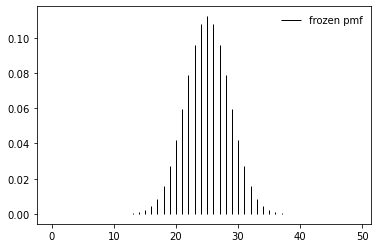

In [53]:
from scipy.stats import binom

n = 50
p = 0.50
rv = binom(n, p)
# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
x = np.arange(start=0, stop=n, step=1)
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

# Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank Test is a non-parametric hypothesis test that can test the magnitude of differences (and not just the sign, like in the Sign Test).

**Analogous to the Paired t-Test for continuous data**

The test is based on the sum of the ranks, or the rank sum (R<sub>1</sub>), for the group of people with positive d<sub>i</sub> (the rank sum for people for whom treatment A is worse than treatment B)

**Assumptions**:
1. n >= 16 (where n is the # of non-zero d<sub>i</sub>'s, as then the normal approximation can be used for the sampling distribution of R<sub>1</sub>)
2. Continuous, symmetric (but not necessarily normal) distribution

**Hypothesis Testing**:<br>
H0: ∆ = 0<br>
Ha: ∆ != 0<br>
*Where ∆ is the population median of d<sub>i</sub>, and d<sub>i</sub> is the difference in observations (x<sub>i</sub> - y<sub>i</sub>).*

*More generally:<br>*
H0: the distribution of the differences d<sub>i</sub> are symmetric around 0<br>
Ha: the distribution of the differences d<sub>i</sub> are not symmetric around 0

**Alternative Tests**
1. Sign Test, if magnitude of differences it not a concern, however the sign test has less power than the Wilcoxon Signed-Rank test
2. For cardinal data that is normally distributed, the Paired t-test will have more power. 

**Mechanics**:
1. Python<br>
`scipy.stats.wilcoxon(x, y=None, zero_method='wilcox', correction=True, alternative='two-sided')`
2. R <br>
One set of paired differences: <br>
`wilcox.test(x, y = NULL, alternative = "two-sided", mu = 0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`<br>
Two sets of paired scores:<br>
`wilcox.test(x, y, alternative = "two-sided", mu = 0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`

In [31]:
# from example 9.16 on page 351
d = [-8, -7, -7, -7, -6, -6, -5, -5, -4, -3, -3, -3, -3, -3, 
     -2,-2,-2,-2,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3]

In [33]:
len(d)

40

/Users/naekid/opt/anaconda3/envs/personal/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


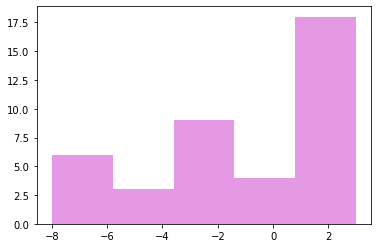

In [38]:
import seaborn as sns

sns.distplot(d, color="m", kde=False);

In [40]:
np.mean(d)

-1.35

It certainly appears that the distribution is centered to the left of 0, and the average is < 0, but is the result significant? 

In [24]:
from scipy.stats import wilcoxon
wilcoxon(d, y=None, zero_method='wilcox', correction=True, alternative='two-sided')

WilcoxonResult(statistic=248.0, pvalue=0.028692758272822194)

In [25]:
%%R -i d
wilcox.test(d,y=NULL,alternative="two.sided",mu=0,paired=FALSE, exact=NULL,correct=TRUE,conf.int=FALSE)

R[write to console]: Error in wilcox.test.default(d, y = NULL, alternative = "two.sided", mu = 0,  : 
  'x' must be numeric




Error in wilcox.test.default(d, y = NULL, alternative = "two.sided", mu = 0,  : 
  'x' must be numeric


OK, this time R didn't work out for us, but we got the same answer as the text did using the python implementation. The results are significant at the 5% level, but is ointment A better or worse than ointment B?

In order to determine that, we can probably just look at the distribution of these differences, but I think technically we would need to compare the calculated rank sum (248.0) to the an expected rank sum under the null hypothesis. 

Under H0: <br>
E(R1)=n(n+1)/4<br>
Var(R1)=n(n+1)(2n+1)/24<br>

In [30]:
# so since n = 40, we have 
n = len(d)
print(n * (n+1) / 4)

410.0


248 < 410.

We calculated the differences d<sub>i</sub> by taking the result on arm A and subtracting the result on arm B for each paired sample. So under H0, we'd expect the differences to be centered around 0

The test statistic 248 is calculated by calculating the rank sum for only the positive differences (where ointment B performed better than ointment A). 

*See text for how to calculate rank sum but it's just the SUM(count[i] * average_rank[i], for each i where d[i] > 0)*

Ex: R1 =10(7.5)+6(19.5)+2(28.0)=75+117+56=248

**Since 248 < 410, ointment B performs worse than ointment A.**

# Wilcoxon Rank-Sum Test

**Nonparametric analog to t test for two independent samples.**

*Also sometimes known as the Mann-Whitney U test*

**Mechanics**:
1. Python<br>
2. R <br>
`wilcox.test(x, y, alternative = "two-sided", mu=0, paired = FALSE, exact = NULL, correct = TRUE, conf.int = FALSE)`<br>

In a study, 28 adults with mild periodontal disease are assessed before and 6 months after implementation of a dental-education program intended to promote better oral hygiene. After 6 months, periodontal status improved in 15 patients, declined in 8, and remained the same in 5.

*9.1 Assess the impact of the program statistically (use a two-sided test).
Suppose patients are graded on the degree of change in periodontal status on a 7-point scale, with +3 indicating the greatest improvement, 0 indicating no change, and −3 indi- cating the greatest decline. The data are given in Table 9.9.

9.2 What nonparametric test can be used to determine whether a significant change in periodontal status has occurred over time?

9.3 Implement the procedure in Problem 9.2, and report a p-value.